## Introduction  

Access to credit is a major driver of financial inclusion, but loan defaults remain a significant challenge for lenders.  
Accurately predicting whether a borrower is likely to default helps institutions **reduce financial risk**, **improve profitability**, and **extend credit responsibly**.  

In this project, I applied **data science and machine learning techniques** to build a predictive model for loan default classification.  
The process included:  
- **Exploratory Data Analysis (EDA):** understanding trends, distributions, and feature relationships.  
- **Feature Engineering:** creating meaningful variables such as loan-to-income ratio, interest fee, and date-based features.  
- **Model Development:** testing multiple algorithms including Logistic Regression, Random Forest, XGBoost, and LightGBM.  
- **Hyperparameter Tuning & Threshold Adjustment:** optimizing performance and aligning predictions with business priorities.  
- **Model Interpretation:** analyzing feature importance to explain predictions.  
- **Deployment Preparation:** creating a pipeline for real-world use via Streamlit.  

The end goal is to provide a **data-driven tool** that supports credit decisions — flagging high-risk applicants while allowing more reliable borrowers to access credit.  

---

## Problem Statement  

Loan defaults pose a significant risk to financial institutions, reducing available capital and threatening long-term sustainability. Traditional credit evaluation often relies heavily on **manual processes or limited criteria**, which may not capture hidden patterns in borrower behavior.  

The challenge is to leverage **historical loan and customer data** to build a machine learning model that can **predict the likelihood of default before disbursement**.  

---

## Project Objectives  

1. **Understand the Data:** Perform exploratory analysis to identify key patterns and correlations.  
2. **Engineer Predictive Features:** Create new variables that capture borrower risk more effectively.  
3. **Model Development:** Train and compare different machine learning algorithms for prediction.  
4. **Optimize Model Performance:** Use hyperparameter tuning and threshold adjustments to balance precision and recall.  
5. **Interpretability:** Identify the most important features driving default predictions.  
6. **Deployment:** Build a streamlined prediction pipeline and deploy via **Streamlit** for business use.  


## 2. Code and Analysis

### Importing Libaries

In [ ]:
#importing the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Loading Data

In [ ]:
url1 = "https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv"
url2 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv'
url3 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv'

In [ ]:
#loading the datasets
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)

In [ ]:
df1.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [ ]:
df1.shape

(4346, 9)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [ ]:
#checking for percentage of missing values
missing_percentage = df1.isnull().mean() * 100
print(missing_percentage.sort_values(ascending= False))

bank_branch_clients           98.826507
level_of_education_clients    86.493327
employment_status_clients     14.910262
customerid                     0.000000
birthdate                      0.000000
latitude_gps                   0.000000
longitude_gps                  0.000000
bank_account_type              0.000000
bank_name_clients              0.000000
dtype: float64


In [ ]:
df1.level_of_education_clients.unique()

array([nan, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary'],
      dtype=object)

### Dataset 1 – Observations Before Cleaning

- This file has 4,346 rows and 9 columns.
- `customerid` is the main ID for each customer and will help me link this dataset to the others.
- `birthdate` is stored as text. I will need to change it to a date format so I can calculate age.
- `longitude_gps` and `latitude_gps` are numbers that probably show where the customer is located.
- The other columns are text with information about bank account type, bank name, employment status, and education level.
- `bank_branch_clients` has only 51 values filled out (about 98% empty), so it’s probably not useful.
- `employment_status_clients` has about 15% missing values, which I can fill with “Unknown”.
- `level_of_education_clients` has about 86% missing values, so I can also fill it with “Unknown” or decide later if I should drop it.
- I think I can create a new column for age using `birthdate`.

**What I plan to do next:**
1. Clean `customerid` (remove spaces, lowercase).
2. Convert `birthdate` to real date format.
3. Drop `bank_branch_clients` because it’s mostly empty.
4. Fill missing values in `employment_status_clients` and `level_of_education_clients` with “Unknown”.
5. Remove duplicate records if there are any.
6. Create a new `age` column from `birthdate`.


### Data Cleaning for `Dataset 1(df1)`

In [ ]:
# Convert customerid to consistent format
df1['customerid'] = df1['customerid'].astype(str).str.strip().str.lower()

In [ ]:
# Convert birthdate to datetime
df1['birthdate'] = pd.to_datetime(df1['birthdate'], errors='coerce')

In [ ]:
# Drop columns with very high missing values
df1.drop(columns=['bank_branch_clients'], inplace=True)

In [ ]:
# Fill missing values for categorical columns
df1['employment_status_clients'] = df1['employment_status_clients'].fillna('Unknown')
df1['level_of_education_clients'] = df1['level_of_education_clients'].fillna('Unknown')

In [ ]:
# Drop duplicates just in case
df1.drop_duplicates(subset=['customerid'], inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4334 entries, 0 to 4345
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4334 non-null   object        
 1   birthdate                   4334 non-null   datetime64[ns]
 2   bank_account_type           4334 non-null   object        
 3   longitude_gps               4334 non-null   float64       
 4   latitude_gps                4334 non-null   float64       
 5   bank_name_clients           4334 non-null   object        
 6   employment_status_clients   4334 non-null   object        
 7   level_of_education_clients  4334 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 304.7+ KB


### Data Cleaning for `Dataset 2(df2)`

In [ ]:
df2.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


### Dataset 2 – Observations Before Cleaning

- This file has 4,368 rows and 10 columns.
- Two important ID columns:
  - `customerid` (links to Dataset 1)
  - `systemloanid` (links to Dataset 3)
- Dates (`approveddate`, `creationdate`) are stored as text. I’ll need to change them to date format so I can do time calculations later.
- `loanamount` and `totaldue` are numbers, `termdays` is an integer, and the rest are text.
- `referredby` has a lot of missing values (about 87% empty), so it might not be useful.
- The target column is `good_bad_flag`:
  - “Good” means the person paid back
  - “Bad” means the person defaulted
  - When I counted them:
    - Good: 3,416 loans (~78%)
    - Bad: 952 loans (~22%)
  - This means there are more “Good” loans than “Bad” loans, so the data is imbalanced. I’ll need to fix that later when I build my models.
- Things I think I can create from this data during `Feature Engineering`:
  - A new column that shows how much more they had to repay compared to the loan amount (`totaldue / loanamount`)
  - The number of days between `approveddate` and `creationdate`

**What I plan to do next:**
1. Make sure `customerid` is clean (remove spaces, uppercase).
2. Change `systemloanid` to string so it matches other datasets.
3. Convert the date columns into real dates.
4. Drop `referredby` because it’s mostly empty.
5. Remove duplicate records if any.
6. Encode `good_bad_flag` using label encoder (0 = Good, 1 = Bad).
7. Create extra columns for loan ratio and processing delay.


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [ ]:
#checking for percentage of missing values
missing_percentage = df2.isnull().mean() * 100
print(missing_percentage.sort_values(ascending= False))

referredby       86.561355
customerid        0.000000
systemloanid      0.000000
loannumber        0.000000
creationdate      0.000000
approveddate      0.000000
loanamount        0.000000
totaldue          0.000000
termdays          0.000000
good_bad_flag     0.000000
dtype: float64


In [ ]:
df2.good_bad_flag.value_counts()

,count
good_bad_flag,
Good,3416
Bad,952


In [ ]:
#Standardizing customerid for merging
df2['customerid'] = df2['customerid'].astype(str).str.strip().str.lower()

In [ ]:
#Converting to date columns
df2['approveddate'] = pd.to_datetime(df2['approveddate'], errors='coerce')
df2['creationdate'] = pd.to_datetime(df2['creationdate'], errors='coerce')

In [ ]:
#Standardizing systemloanid for merging later
df2['systemloanid'] = df2['systemloanid'].astype(str).str.strip()

In [ ]:
#dropping the referredby column as it mostly empty
df2.drop(columns=['referredby'], inplace=True)

In [ ]:
#Remove duplicates based on unique loan identifier
df2.drop_duplicates(subset=['customerid', 'systemloanid'], inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customerid     4368 non-null   object        
 1   systemloanid   4368 non-null   object        
 2   loannumber     4368 non-null   int64         
 3   approveddate   4368 non-null   datetime64[ns]
 4   creationdate   4368 non-null   datetime64[ns]
 5   loanamount     4368 non-null   float64       
 6   totaldue       4368 non-null   float64       
 7   termdays       4368 non-null   int64         
 8   good_bad_flag  4368 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 307.3+ KB


### Data Cleaning for `Dataset 3(df3)`

In [ ]:
df3.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [ ]:
df3.shape

(18183, 12)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


### Dataset 3 – Observations Before Cleaning

- This file has 18,183 rows and 12 columns.
- `customerid` and `systemloanid` are important IDs that will help link this dataset to the other two.
- `approveddate`, `creationdate`, `closeddate`, `firstduedate`, and `firstrepaiddate` are all stored as text but they are actually dates. I will need to convert them into real date format so I can work with them.
- `loanamount`, `totaldue`, and `termdays` are numbers.
- `referredby` has a lot of missing values (about 94% empty), so it’s probably not useful.
- This dataset has more rows than the other two, which might mean that some customers have more than one loan here.
- I can use the dates to create new columns, for example:
  - How many days it took from `approveddate` to `creationdate`
  - How many days late the loan was repaid (`closeddate` minus `firstduedate`)

**What I plan to do next:**
1. Clean `customerid` (remove spaces, lowercase).
2. Change `systemloanid` to string so it matches the other datasets.
3. Convert all the date columns to real dates.
4. Drop `referredby` because it’s mostly empty.
5. Remove duplicate records if there are any.
6. Create new columns for things like processing delay and overdue days.


In [ ]:
#Standardizing customerid
df3['customerid'] = df3['customerid'].astype(str).str.strip().str.lower()

In [ ]:
#Standardize systemloanid
df3['systemloanid'] = df3['systemloanid'].astype(str).str.strip()

In [ ]:
#Convert to date columns
date_cols = ['approveddate', 'creationdate', 'closeddate', 'firstduedate', 'firstrepaiddate']
for col in date_cols:
    df3[col] = pd.to_datetime(df3[col], errors='coerce')

In [ ]:
#Drop column with high missing values
df3.drop(columns=['referredby'], inplace=True)

In [ ]:
df3.drop_duplicates(subset=['customerid', 'systemloanid', 'loannumber'], inplace=True)

In [ ]:
df3.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,2017-07-03,2017-07-14 21:08:35


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerid       18183 non-null  object        
 1   systemloanid     18183 non-null  object        
 2   loannumber       18183 non-null  int64         
 3   approveddate     18183 non-null  datetime64[ns]
 4   creationdate     18183 non-null  datetime64[ns]
 5   loanamount       18183 non-null  float64       
 6   totaldue         18183 non-null  float64       
 7   termdays         18183 non-null  int64         
 8   closeddate       18183 non-null  datetime64[ns]
 9   firstduedate     18183 non-null  datetime64[ns]
 10  firstrepaiddate  18183 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(2), int64(2), object(2)
memory usage: 1.5+ MB


## Merging the Datasets

### Objective
The aim of this step was to combine all available data sources into one master dataset for analysis and modeling.  
- **Dataset 1**: Customer demographic information  
- **Dataset 2**: Loan performance data (includes the target variable `good_bad_flag`)  
- **Dataset 3**: Loan lifecycle details (e.g., repayment dates, closed dates)  

### Merge Process

#### 1. Merge Dataset 1 and Dataset 2
- **Merge Key:** `customerid`  
- **Join Type:** right join (keeps all loans from Dataset 2)  
- **Purpose:** Add demographic details from Dataset 1 to the loan performance data in Dataset 2, ensuring the target variable is retained.

#### 2. Prepare Dataset 3 for merging
Before merging, duplicate columns were removed from Dataset 3 to avoid `_x` and `_y` suffixes.  
These columns (`loannumber`, `approveddate`, `creationdate`, `loanamount`, `totaldue`, `termdays`) already exist in Dataset 2 and were not needed from Dataset 3.

#### 3. Merge merged_df with Dataset 3
- **Merge Key:** `customerid`
- **Join Type:** Left join (keeps all rows from merged_df)  

In [ ]:
#merging Dataset 1 + Dataset 2
merged_df = pd.merge(df1, df2, on='customerid', how='right')
merged_df

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good
1,8a85886e54beabf90154c0a29ae757c0,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good
2,8a8588f35438fe12015444567666018e,1984-09-18,Other,11.139350,10.292041,EcoBank,Permanent,Unknown,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good
3,8a85890754145ace015429211b513e16,1977-10-10,Savings,3.985770,7.491708,First Bank,Permanent,Unknown,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good
4,8a858970548359cc0154883481981866,1986-09-07,Other,7.457913,9.076574,GT Bank,Permanent,Primary,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,NaT,NaN,NaN,NaN,NaN,NaN,NaN,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,1989-12-04,Savings,4.607358,8.460608,FCMB,Permanent,Unknown,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,Bad
4365,8a858f365b2547f3015b284597147c94,1989-11-21,Savings,3.976842,7.409129,First Bank,Permanent,Unknown,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,1990-06-11,Savings,3.986089,7.386796,Skye Bank,Permanent,Unknown,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,Bad


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4368 non-null   object        
 1   birthdate                   3269 non-null   datetime64[ns]
 2   bank_account_type           3269 non-null   object        
 3   longitude_gps               3269 non-null   float64       
 4   latitude_gps                3269 non-null   float64       
 5   bank_name_clients           3269 non-null   object        
 6   employment_status_clients   3269 non-null   object        
 7   level_of_education_clients  3269 non-null   object        
 8   systemloanid                4368 non-null   object        
 9   loannumber                  4368 non-null   int64         
 10  approveddate                4368 non-null   datetime64[ns]
 11  creationdate                4368 non-null   datetime64[n

In [ ]:
#Dropping duplicate columns from Dataset 3 before merging
df3_clean = df3.drop(columns=[
    "loannumber", "approveddate", "creationdate",
 "loanamount", "totaldue", "termdays"
])

#Merge the result with Dataset 3
final_df = pd.merge(merged_df, df3_clean, on=["customerid", "systemloanid"], how="left")

#Check final dataset
print(final_df.shape)
final_df.head(15)

(4368, 19)


,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,closeddate,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,NaT,NaT,NaT
1,8a85886e54beabf90154c0a29ae757c0,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good,NaT,NaT,NaT
2,8a8588f35438fe12015444567666018e,1984-09-18,Other,11.139350,10.292041,EcoBank,Permanent,Unknown,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,NaT,NaT,NaT
3,8a85890754145ace015429211b513e16,1977-10-10,Savings,3.985770,7.491708,First Bank,Permanent,Unknown,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,NaT,NaT,NaT
4,8a858970548359cc0154883481981866,1986-09-07,Other,7.457913,9.076574,GT Bank,Permanent,Primary,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,NaT,NaT,NaT
5,8a8589f35451855401546b0738c42524,NaT,NaN,NaN,NaN,NaN,NaN,NaN,301986516,8,2017-07-19 21:46:24,2017-07-19 20:46:18,30000.0,39000.0,60,Good,NaT,NaT,NaT
6,8a858e095c59b91b015c5e5cea3719bc,1989-05-29,Savings,3.259444,6.557011,GT Bank,Permanent,Unknown,301972027,3,2017-07-10 19:25:33,2017-07-10 18:25:28,10000.0,13000.0,30,Good,NaT,NaT,NaT
7,8a858e1158dc4d830158f7bde4f47ea7,1987-09-20,Savings,6.178056,5.425800,First Bank,Unknown,Unknown,301994428,10,2017-07-24 23:42:27,2017-07-24 22:42:21,30000.0,34500.0,30,Good,NaT,NaT,NaT
8,8a858e185b4923b4015b4ae48d28646a,1987-06-09,Savings,3.396524,6.627943,GT Bank,Permanent,Unknown,301996687,4,2017-07-26 10:53:05,2017-07-26 09:52:57,10000.0,11500.0,15,Good,NaT,NaT,NaT
9,8a858e1d5cd58f9e015ceda4bdb63673,1984-12-10,Savings,3.285872,6.582444,Access Bank,Unemployed,Unknown,301981931,2,2017-07-17 13:48:42,2017-07-17 12:48:35,10000.0,11500.0,15,Good,NaT,NaT,NaT


In [ ]:
final_df.duplicated().sum()

np.int64(0)

In [ ]:
final_df.isna().sum().sort_values(ascending= False)

,0
firstduedate,4368
closeddate,4368
firstrepaiddate,4368
level_of_education_clients,1099
bank_account_type,1099
birthdate,1099
longitude_gps,1099
bank_name_clients,1099
latitude_gps,1099
employment_status_clients,1099


In [ ]:
#checking for percentage of missing values
missing_percentage = final_df.isnull().mean() * 100
print(missing_percentage.sort_values(ascending= False))

firstduedate                  100.000000
closeddate                    100.000000
firstrepaiddate               100.000000
level_of_education_clients     25.160256
bank_account_type              25.160256
birthdate                      25.160256
longitude_gps                  25.160256
bank_name_clients              25.160256
latitude_gps                   25.160256
employment_status_clients      25.160256
customerid                      0.000000
approveddate                    0.000000
loannumber                      0.000000
systemloanid                    0.000000
creationdate                    0.000000
termdays                        0.000000
totaldue                        0.000000
loanamount                      0.000000
good_bad_flag                   0.000000
dtype: float64


In [ ]:
final_df.drop(columns = ['firstrepaiddate', 'firstduedate', 'closeddate'], inplace = True)

### Final Output
- **Shape:** : `4368 rows` and `16 columns`  
- **Result:** Combined dataset containing:
  - Demographic information (Dataset 1)  
  - Loan performance data (Dataset 2)  
  - Loan lifecycle details (Dataset 3)  
- This master dataset is now ready for further processing such as encoding, feature engineering, and modeling.

In [ ]:
# Save the dataset to CSV for Power BI
final_df.to_csv("loan_Predict_cleaned.csv", index=False)

## 2. Exploratory Data Analysis

In this section, we explore the dataset visually and statistically to identify patterns, correlations, and potential data quality issues.

In [ ]:
final_df.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid', 'loannumber',
       'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays',
       'good_bad_flag'],
      dtype='object')

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4368 non-null   object        
 1   birthdate                   3269 non-null   datetime64[ns]
 2   bank_account_type           3269 non-null   object        
 3   longitude_gps               3269 non-null   float64       
 4   latitude_gps                3269 non-null   float64       
 5   bank_name_clients           3269 non-null   object        
 6   employment_status_clients   3269 non-null   object        
 7   level_of_education_clients  3269 non-null   object        
 8   systemloanid                4368 non-null   object        
 9   loannumber                  4368 non-null   int64         
 10  approveddate                4368 non-null   datetime64[ns]
 11  creationdate                4368 non-null   datetime64[n

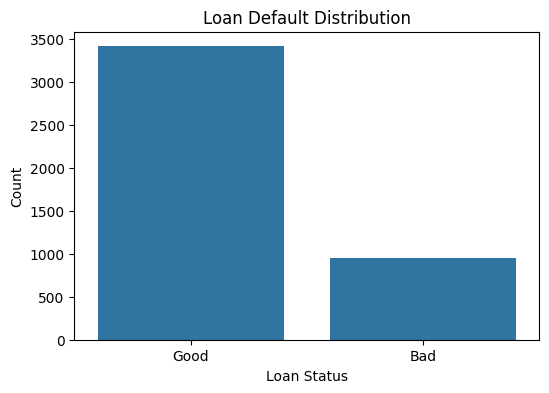

In [ ]:
#Visualizing the distribution of the target column
plt.figure(figsize=(6,4))
sns.countplot(x='good_bad_flag', data=final_df)
plt.title('Loan Default Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

## Target Imbalance

The target column `good_bad_flag` is imbalanced:  
- **Good**: ~78%  
- **Bad**: ~22%  

This can bias the model towards predicting “Good” more often.  
#### To balance we can use:
- **Oversampling using SMOTE** – create synthetic samples of the minority class.  
- **Undersampling** – reduce the majority class by randomly removing samples.  
- **Class weight** – assign higher weights to the minority class during model training.  
- **Ensemble methods** – use algorithms like Balanced Random Forest designed for imbalanced datasets.


In [ ]:
final_df.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid', 'loannumber',
       'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays',
       'good_bad_flag'],
      dtype='object')

In [ ]:
#splitting into numerical and categorical columns
num_col= ['loannumber', 'loanamount', 'totaldue', 'termdays']
cat_col= ['bank_account_type', 'bank_name_clients', 'employment_status_clients', 'level_of_education_clients']

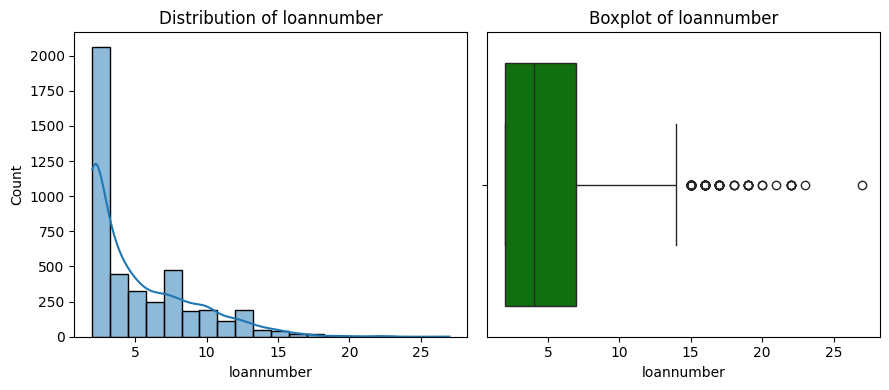


Column: loannumber
Number of outliers: 96
Outlier values sample:
[15, 15, 17, 15, 18]


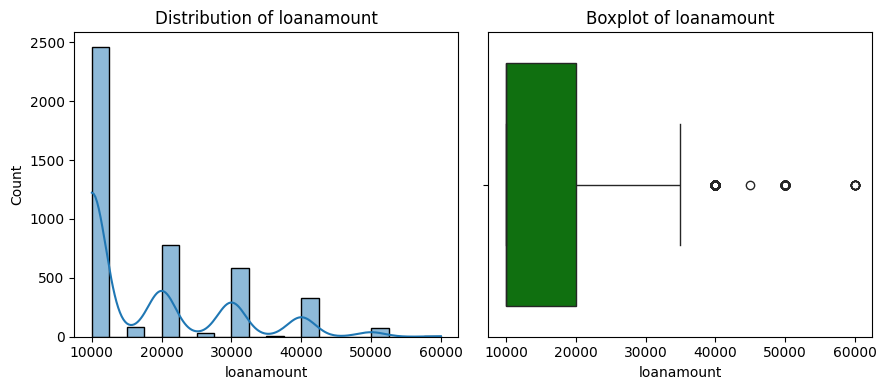


Column: loanamount
Number of outliers: 419
Outlier values sample:
[40000.0, 40000.0, 40000.0, 40000.0, 40000.0]


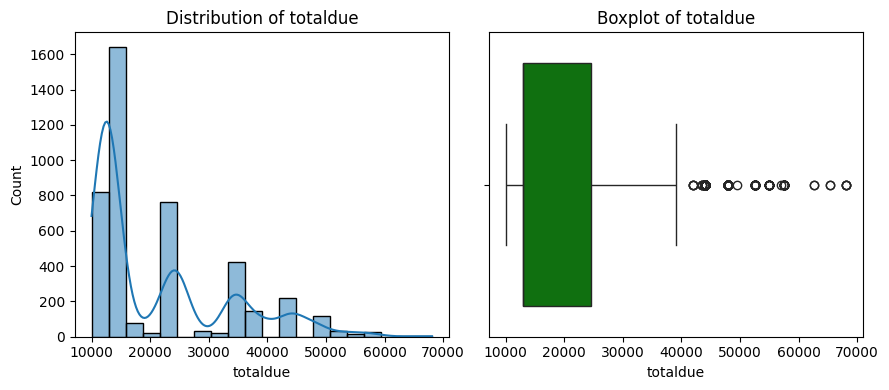


Column: totaldue
Number of outliers: 422
Outlier values sample:
[44000.0, 44000.0, 44000.0, 44000.0, 44000.0]


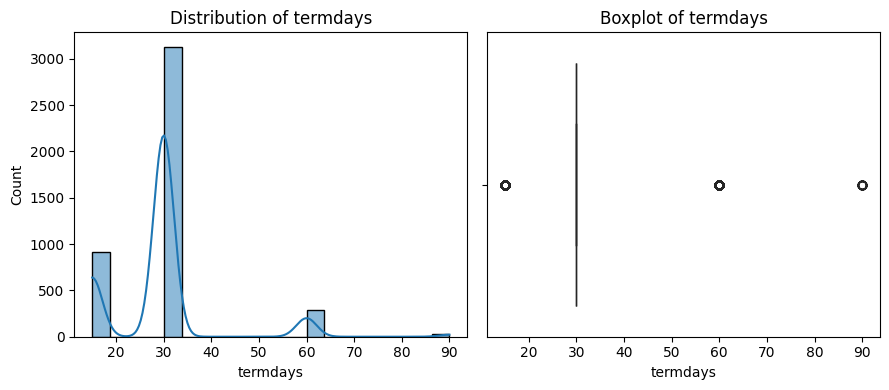


Column: termdays
Number of outliers: 1239
Outlier values sample:
[15, 15, 60, 15, 15]


In [ ]:
# Loop through each numerical column and plot histogram + boxplot + detect outliers
for col in num_col:
    plt.figure(figsize=(9, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=final_df, x=col, bins=20, kde=True)
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=final_df, x=col, color='green')
    plt.xlabel(col)
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

    # Detect outliers using IQR
    Q1 = final_df[col].quantile(0.25)
    Q3 = final_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = final_df[(final_df[col] < lower_bound) | (final_df[col] > upper_bound)][col]

    print(f"\nColumn: {col}")
    print(f"Number of outliers: {outliers.count()}")
    if not outliers.empty:
        print("Outlier values sample:")
        print(outliers.head(5).to_list())
    else:
        print("No outliers detected.")


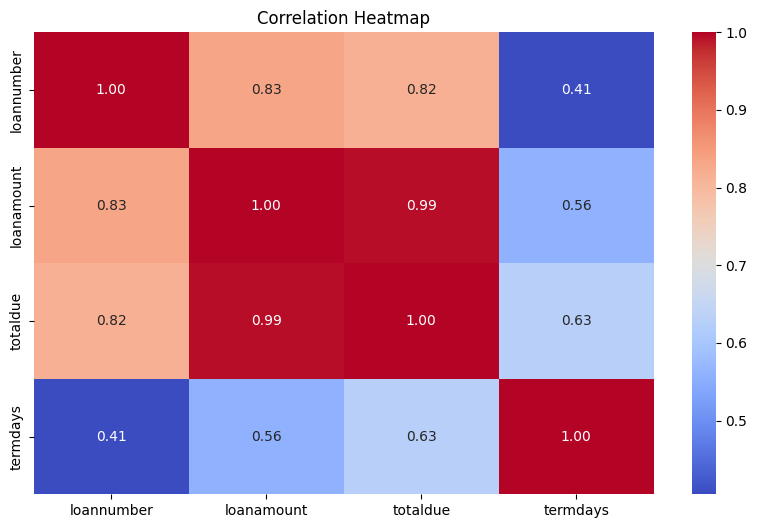

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
corr_matrix = final_df[num_col].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Handling Multicollinearity from Correlation Heatmap

From the correlation heatmap, we can see that some features are **very highly correlated**:

- `loanamount` and `totaldue` have a correlation of **0.99**, meaning they carry almost identical information.  
- `loanamount` and `loannumber` also show a strong correlation (**0.83**).  
- `totaldue` and `loannumber` are similarly correlated (**0.82**).  
- `termdays` shows moderate correlation with both `loanamount` (**0.56**) and `totaldue` (**0.63**).

### Why This Matters
This situation is known as **multicollinearity**, where multiple variables provide overlapping information.  
- For models like **Logistic Regression**, this can make coefficients unstable and hard to interpret.  
- For tree-based models (Random Forest, XGBoost, LightGBM), it is less damaging but still introduces redundancy and noise.  

### How We Handle It
1. **Drop redundant features**  
   Since `loanamount` and `totaldue` are almost identical, we drop one (`totaldue`).  

2. **Create a derived feature**  
   Instead of discarding all information, we extract new insights by creating:  
   `interest_fee = totaldue - loanamount`  
   This captures the interest and fees charged on each loan.  

3. **Re-check correlations**  
   After dropping and engineering features, we recompute the correlation matrix to confirm reduced redundancy.

### Decision
We keep `loanamount`, remove `totaldue`, and add `interest_fee` as a new variable.  
This reduces multicollinearity while still preserving valuable financial information for the model.


Highly correlated features (>0.9):
('totaldue', 'loanamount', np.float64(0.9943919744421869))


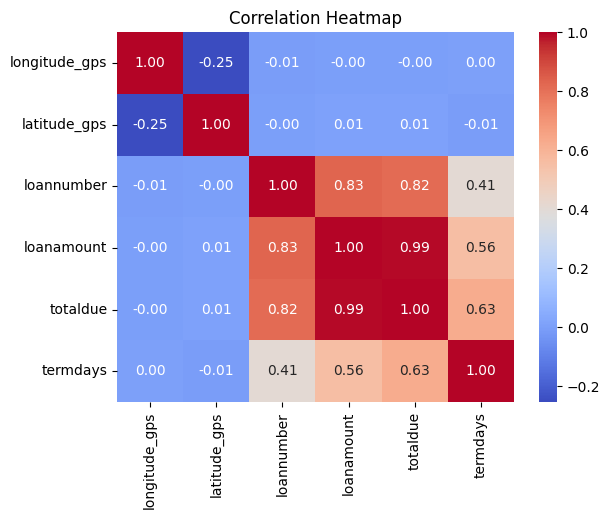

In [ ]:

df = final_df.copy()

# Identify highly correlated features (threshold = 0.9)
threshold = 0.9
high_corr = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr.add((col1, col2, corr_matrix.iloc[i, j]))

print("Highly correlated features (>0.9):")
for pair in high_corr:
    print(pair)

# Drop one of the highly correlated features (drop totaldue, keep loanamount)
if "totaldue" in final_df.columns:
    df["interest_fee"] = df["totaldue"] - df["loanamount"]
    df.drop(columns=["totaldue"], inplace=True)

# Check correlation again after dropping
new_corr = final_df.corr(numeric_only=True)
sns.heatmap(new_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

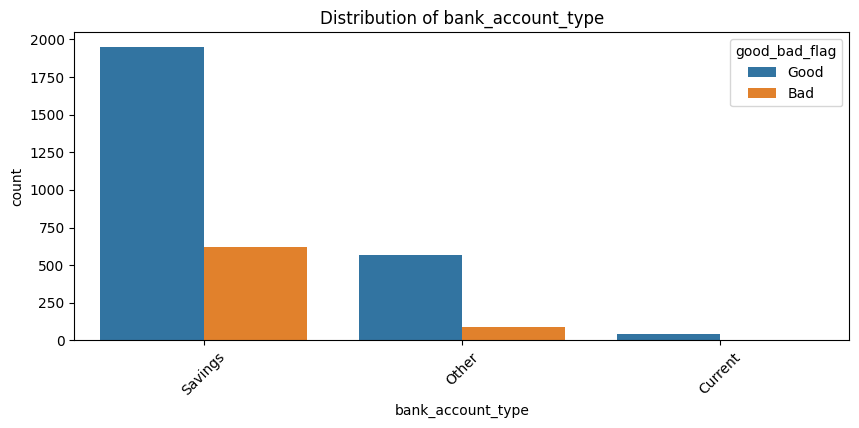

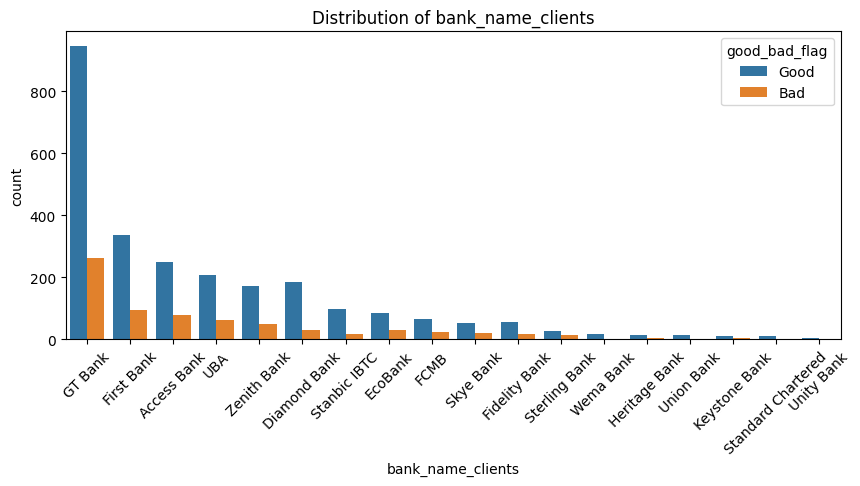

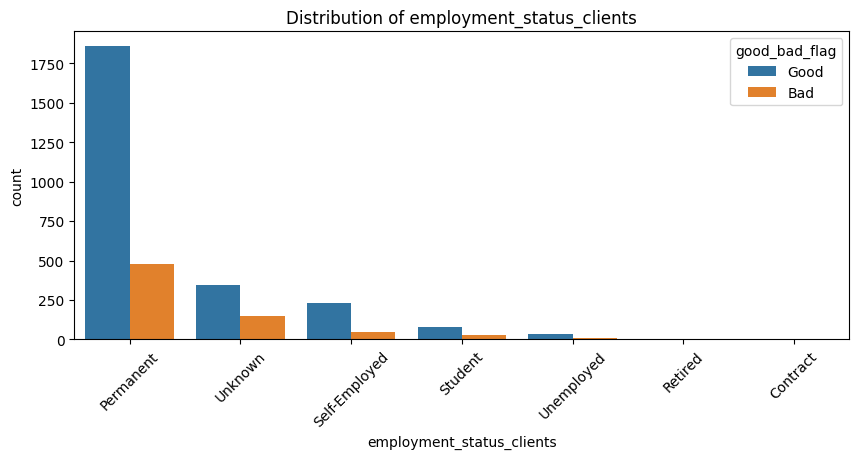

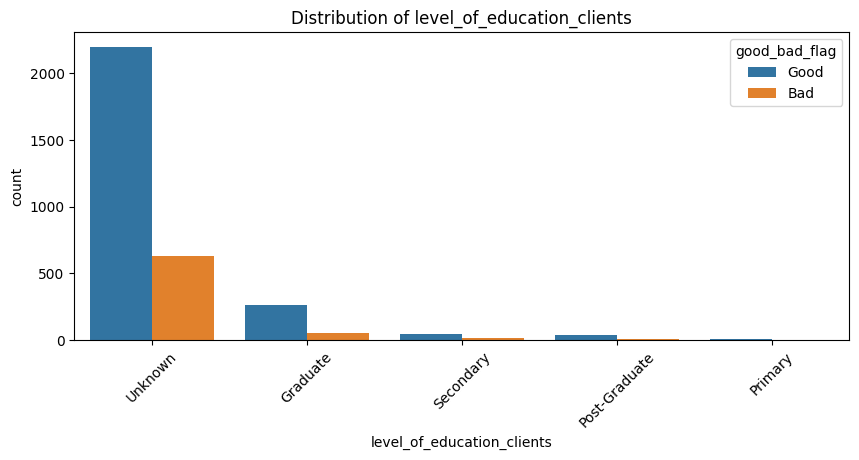

In [ ]:
for col in cat_col:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=df,hue= df['good_bad_flag'], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

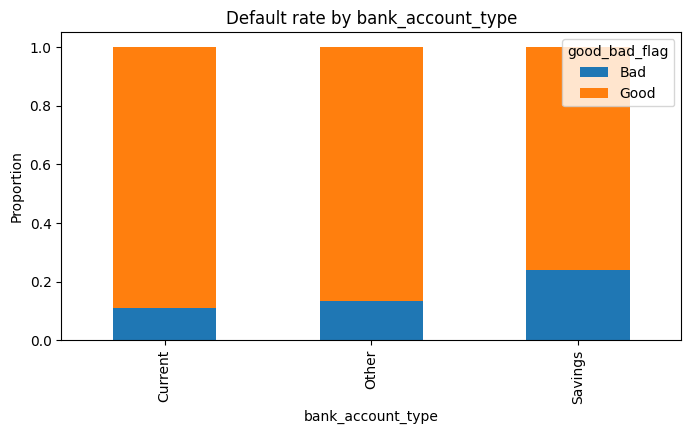

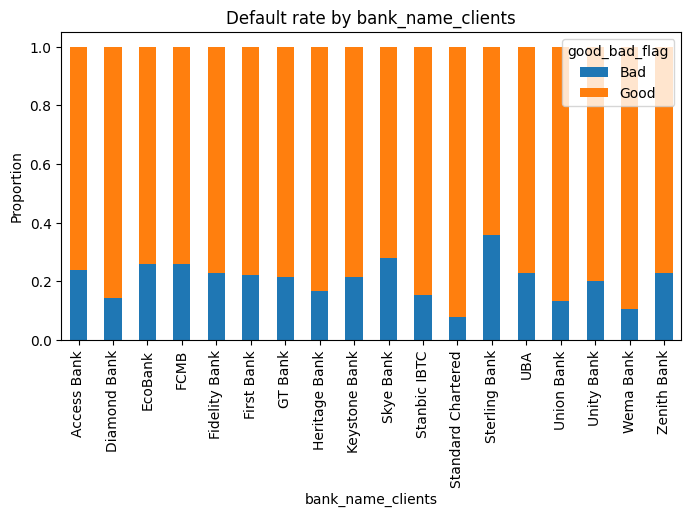

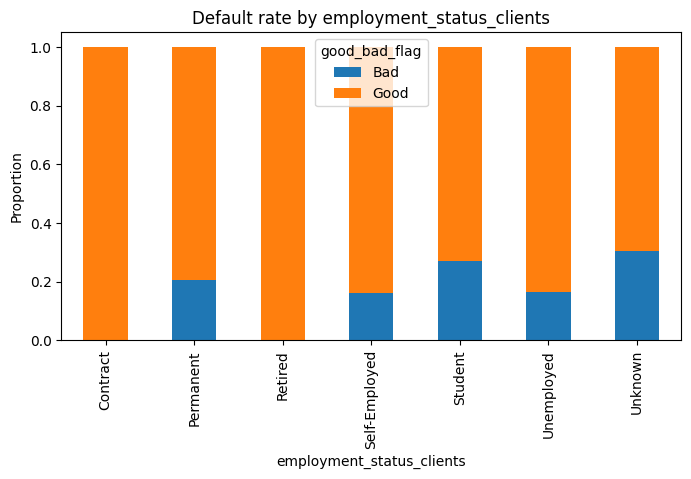

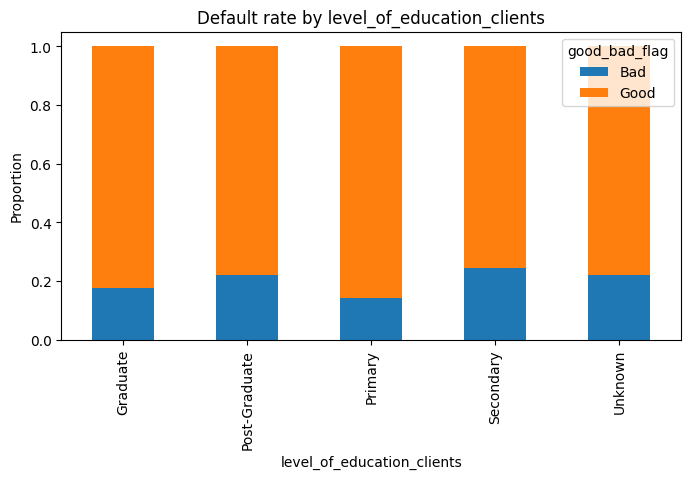

In [ ]:
for col in cat_col:
    cross_tab = pd.crosstab(final_df[col], final_df["good_bad_flag"], normalize="index")
    cross_tab.plot(kind="bar", stacked=True, figsize=(8,4))
    plt.title(f"Default rate by {col}")
    plt.ylabel("Proportion")
    plt.show()

## Feature Engineering  

In this step, we created additional variables from the existing dataset to provide the models with richer signals about customer and loan behavior:  

1. **Loan-to-Income Ratio**  
   - Formula:  
     ```
     loan_to_income_ratio = loanamount / totaldue
     ```  
   - This ratio indicates how much the loan amount compares to the total repayment required. A higher ratio may reflect higher interest/fees or repayment stress.  

2. **Age of Customer**  
   - Derived from the `birthdate` field.  
   - Calculated as the difference between today’s date and the customer’s birthdate (in years).  
   - This helps capture the influence of age on repayment behavior.  

In [ ]:
#Feature Engineering

# Loan-to-Income ratio
df["loan_to_income_ratio"] = df["loanamount"] / (final_df["totaldue"] + 1e-5)

# Age
df["age"] = (pd.to_datetime("today") - df["birthdate"]).dt.days // 365

# Extract year and month from approval date
df["approved_year"] = df["approveddate"].dt.year
df["approved_month"] = df["approveddate"].dt.month



# Application lag (days between creation and approval)
df["application_lag_days"] = (df["approveddate"] - df["creationdate"]).dt.days



## Data Preprocessing  

Before building machine learning models, the dataset needed to be cleaned and transformed into a format suitable for analysis.  
Preprocessing ensures that the model receives **consistent, high-quality inputs**, which directly impacts prediction performance.  

### Key Steps in Preprocessing  

1. **Handling Missing Values:**  
   - Checked for missing or null values in the dataset.  
   - Applied appropriate strategies (e.g., imputation, dropping irrelevant columns).  

2. **Encoding Categorical Variables:**  
   - Many features such as `bank_name_clients`, `employment_status_clients`, and `education_level_clients` are categorical.  
   - Used **One-Hot Encoding** within a `ColumnTransformer` to convert them into numerical format.  

3. **Scaling Numerical Features:**  
   - Applied **StandardScaler** to normalize continuous variables like `age`, `loanamount`, and `loan_to_income_ratio`.  
   - This prevents models (especially distance-based ones) from being biased by scale differences.  

4. **Feature Engineering:**  
   - Derived new features such as:  
     - `interest_fee = totaldue – loanamount`  
     - `loan_to_income_ratio = loanamount / income`  
     - Date-based features from datetime columns (e.g., loan month, day of week).  

5. **Dropping Irrelevant / Redundant Features:**  
   - Removed identifiers and highly correlated columns (e.g., `longitude`, `latitude`, `totaldue`) to avoid multicollinearity and noise.  

6. **Train-Test Split:**  
   - Split data into **training (80%)** and **testing (20%)** sets using stratification to maintain the class balance.  

---

This preprocessing pipeline was implemented using **Scikit-Learn’s `Pipeline` and `ColumnTransformer`**, ensuring that the same transformations can be applied consistently during both training and deployment.  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#### Data Preparation

In [ ]:
#spliting into feature and target columns
# Target
y = df["good_bad_flag"].map({"Good": 0, "Bad": 1})

# Features
x = df.drop(columns=["good_bad_flag", "customerid", "birthdate", "level_of_education_clients", "systemloanid", "longitude_gps","latitude_gps"])

In [ ]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=42, stratify=y)

In [ ]:
# Seperating into categorical and Numerical columns for encoding
num_cols = x.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = x.select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
x.head()

,bank_account_type,bank_name_clients,employment_status_clients,loannumber,approveddate,creationdate,loanamount,termdays,interest_fee,loan_to_income_ratio,age,approved_year,approved_month,application_lag_days
0,Other,Diamond Bank,Permanent,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,30,4500.0,0.869565,53.0,2017,7,0
1,Savings,GT Bank,Permanent,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,30,2250.0,0.869565,40.0,2017,7,0
2,Other,EcoBank,Permanent,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,15,2250.0,0.898876,40.0,2017,7,0
3,Savings,First Bank,Permanent,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,15,1500.0,0.869565,47.0,2017,7,0
4,Other,GT Bank,Permanent,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,30,4000.0,0.909091,38.0,2017,7,0


### Creating a Pipeline

In [ ]:
# Ordinal encoding for education
edu_order = {"Unknown": 0, "Primary": 1, "Secondary": 2, "Graduate": 3, "Post-Graduate": 4}
df["education_encoded"] = df["level_of_education_clients"].map(edu_order)


In [ ]:
# Pipelines for numeric and categorical data
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine both
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['loannumber', 'loanamount', 'termdays',
                                  'interest_fee', 'loan_to_income_ratio', 'age',
                                  'approved_year', 'approved_month',
                                  'application_lag_days']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['bank_account_type', 'bank_name_clients',
                                  'employment_status_clients', 'approveddate',
                                  'creationdate'])])

In [ ]:
#Baseline Evaluation (Before SMOTE) with Train & Test Scores

# Transform the training and test sets using the preprocessing pipeline
x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Store results in a list
results = []

for name, model in models.items():
    # Fit the model
    model.fit(x_train_processed, y_train)

    # Predict train and test
    y_train_pred = model.predict(x_train_processed)
    y_test_pred = model.predict(x_test_processed)

    # Train Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred)

    # Test Metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)


    # Save results
    results.append([
        name,
        train_accuracy, train_precision, train_recall, train_f1, train_roc_auc,
        test_accuracy, test_precision, test_recall, test_f1, test_roc_auc
    ])

# Convert results to DataFrame
baseline_results = pd.DataFrame(results, columns=[
    "Model",
    "Train_Accuracy", "Train_Precision", "Train_Recall", "Train_F1", "Train_ROC_AUC",
    "Test_Accuracy", "Test_Precision", "Test_Recall", "Test_F1", "Test_ROC_AUC"
])

print(" Baseline Results (Before SMOTE):")
baseline_results


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:03:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 857, number of negative: 3074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 3931, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218011 -> initscore=-1.277297
[LightGBM] [Info] Start training from score -1.277297


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 Baseline Results (Before SMOTE):


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_ROC_AUC
0,Logistic Regression,0.838718,1.000000,0.260210,0.412963,0.630105,0.782609,0.000000,0.000000,0.000000,0.500000
1,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,0.782609,0.000000,0.000000,0.000000,0.500000
2,XGBoost,0.835665,0.880866,0.284714,0.430335,0.636989,0.752860,0.240000,0.063158,0.100000,0.503801
3,LightGBM,0.817604,0.876344,0.190198,0.312560,0.591358,0.757437,0.176471,0.031579,0.053571,0.495322


In [ ]:
# Step 4: Train + Evaluate with SMOTE

results = []

for name, model in models.items():
    # Create pipeline with SMOTE
    clf = ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("model", model)
    ])

    # Train
    clf.fit(x_train, y_train)

    # Predict
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)

    # Collect metrics
    results.append({
        "Model": name,
        "Train_Accuracy": accuracy_score(y_train, y_train_pred),
        "Train_Precision": precision_score(y_train, y_train_pred),
        "Train_Recall": recall_score(y_train, y_train_pred),
        "Train_F1": f1_score(y_train, y_train_pred),
        "Train_ROC_AUC": roc_auc_score(y_train, y_train_pred),
        "Test_Accuracy": accuracy_score(y_test, y_test_pred),
        "Test_Precision": precision_score(y_test, y_test_pred),
        "Test_Recall": recall_score(y_test, y_test_pred),
        "Test_F1": f1_score(y_test, y_test_pred),
        "Test_ROC_AUC": roc_auc_score(y_test, y_test_pred)
    })


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:03:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 3074, number of negative: 3074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1639
[LightGBM] [Info] Number of data points in the train set: 6148, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
results_df = pd.DataFrame(results)
results_df

,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_ROC_AUC
0,Logistic Regression,0.997456,0.998822,0.989498,0.994138,0.994586,0.771167,0.391304,0.094737,0.152542,0.526901
1,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,0.782609,0.500000,0.021053,0.040404,0.507602
2,XGBoost,0.813788,0.680115,0.275379,0.392027,0.619635,0.784897,0.523810,0.115789,0.189655,0.543275
3,LightGBM,0.801068,0.562604,0.393232,0.462912,0.654001,0.727689,0.260000,0.136842,0.179310,0.514327


### Model Performance Review

After training Logistic Regression, Random Forest, XGBoost, and LightGBM with SMOTE applied, the models showed the following results:

- **Train scores were very high** (close to 1.0 for some models), but **test scores remained low**.
- This indicates that the models are **overfitting** to the training data and failing to generalize.
- Logistic Regression and Random Forest performed the worst on recall and F1 score, meaning they are missing most of the defaulters.
- XGBoost and LightGBM performed slightly better but are still not capturing enough signal to distinguish good vs bad loans effectively.

---

### Why This Happens
1. **Weak Features**: Current features may not carry strong predictive power.
2. **SMOTE Noise**: Oversampling may have introduced synthetic noise that confuses the models.
3. **Default Parameters**: Models were trained with default hyperparameters, which may not be optimal.

---

### Next Steps for Improvement
To improve the models, we will apply three strategies:

1. **Hyperparameter Tuning**
   - Use GridSearchCV or RandomizedSearchCV to optimize model parameters.
   - Helps prevent overfitting and improve generalization.

2. **Feature Importance Analysis**
   - Use tree-based models (Random Forest, XGBoost, LightGBM) to identify the most important predictors.
   - Remove irrelevant features and focus on the top contributors.

3. **Cluster-Based Features (K-Means)**
   - Create new features by clustering customers into groups.
   - Helps capture hidden structures in the data, such as behavioral patterns of defaulters vs good payers.

---

By following this process, we aim to build a more robust model that balances precision and recall, giving better insight into which customers are most at risk of default.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid_logreg = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": [0.01, 0.1, 1, 10],
    "solver": ["saga"],  # saga supports all penalties
    "max_iter": [1000]
}

# Initialize Logistic Regression
logreg = LogisticRegression(random_state=42)

# GridSearchCV
grid_logreg = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid_logreg,
    cv=5,
    scoring="f1",   # focus on F1 because of imbalance
    n_jobs=-1,
    verbose=2
)

# Fit model on training data
grid_logreg.fit(x_train_processed, y_train)

# Best parameters and score
print("Best Logistic Regression Params:", grid_logreg.best_params_)
print("Best Logistic Regression F1 Score:", grid_logreg.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1203, in fit
    raise ValueError("l1_r

Best Logistic Regression Params: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Best Logistic Regression F1 Score: 0.004597853014037985


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Logistic Regression Hyperparameter Tuning

- **Best Params**: `C=1`, `penalty=l2`, `solver=saga`, `max_iter=1000`  
- **Best F1 Score**: **0.0046** (very poor)

**Why so low?**
- Logistic Regression is linear, but the data likely has **non-linear patterns**.  
- Dataset may be **imbalanced/noisy**.  
- Features may need more **engineering/selection**.

**Next Steps**
- Focus on **tree-based models** (RF, XGBoost, LightGBM).  
- Enhance **feature engineering** and drop collinear features.  


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import randint, uniform


# 1. Random Forest

rf = RandomForestClassifier(random_state=42)

rf_params = {
    "n_estimators": randint(100, 500),       # number of trees
    "max_depth": randint(3, 20),             # depth of each tree
    "min_samples_split": randint(2, 20),     # min samples to split
    "min_samples_leaf": randint(1, 10),      # min samples per leaf
    "max_features": ["sqrt", "log2", None]   # features considered at each split
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=20,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1
)

rf_search.fit(x_train_processed, y_train)
print("Best RF Params:", rf_search.best_params_)
print("Best RF F1 Score:", rf_search.best_score_)


# 2. XGBoost

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

xgb_params = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(3, 15),
    "learning_rate": uniform(0.01, 0.3),
    "subsample": uniform(0.5, 0.5),
    "colsample_bytree": uniform(0.5, 0.5),
    "gamma": uniform(0, 5)
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=xgb_params,
    n_iter=20,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(x_train_processed, y_train)
print("Best XGB Params:", xgb_search.best_params_)
print("Best XGB F1 Score:", xgb_search.best_score_)


# 3. LightGBM

lgb_clf = lgb.LGBMClassifier(random_state=42)

lgb_params = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(3, 15),
    "learning_rate": uniform(0.01, 0.3),
    "num_leaves": randint(20, 150),
    "subsample": uniform(0.5, 0.5),
    "colsample_bytree": uniform(0.5, 0.5)
}

lgb_search = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=lgb_params,
    n_iter=20,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1
)

lgb_search.fit(x_train_processed, y_train)
print("Best LGBM Params:", lgb_search.best_params_)
print("Best LGBM F1 Score:", lgb_search.best_score_)


Best RF Params: {'max_depth': 11, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 188}
Best RF F1 Score: 0.0976218649028443


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:24:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'colsample_bytree': np.float64(0.6999304858576277), 'gamma': np.float64(0.23332831606807714), 'learning_rate': np.float64(0.30212665565243774), 'max_depth': 5, 'n_estimators': 463, 'subsample': np.float64(0.7571172192068059)}
Best XGB F1 Score: 0.19436014027286513
[LightGBM] [Info] Number of positive: 857, number of negative: 3074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 3931, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218011 -> initscore=-1.277297
[LightGBM] [Info] Start training from score -1.277297
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

### Hyperparameter Tuning Results for Tree-Based Models

Performed hyperparameter optimization for Random Forest, XGBoost, and LightGBM. Below are the best parameter sets and their corresponding F1 scores.

- **Random Forest**
  - Best Params: `{'max_depth': 19, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 154}`
  - Best F1 Score: **0.1004**

- **XGBoost**
  - Best Params: `{'colsample_bytree': 0.69, 'gamma': 0.23, 'learning_rate': 0.30, 'max_depth': 5, 'n_estimators': 463, 'subsample': 0.76}`
  - Best F1 Score: **0.2034**

- **LightGBM**
  - Best Params: `{'colsample_bytree': 0.66, 'learning_rate': 0.18, 'max_depth': 14, 'n_estimators': 289, 'num_leaves': 59, 'subsample': 0.92}`
  - Best F1 Score: **0.2153**

#### Key Insights
- **LightGBM** slightly outperforms XGBoost and Random Forest on F1 score, suggesting it handles the dataset structure and class imbalance better.  
- **Random Forest** underperforms relative to boosting methods, confirming the added benefit of boosting in capturing complex patterns.  
- **XGBoost vs LightGBM**: Both perform comparably, but LightGBM edges ahead, likely due to faster leaf-wise splits and better handling of sparse features.


In [ ]:
rf_model = rf_search.best_estimator_
xgb_model = xgb_search.best_estimator_
lgbm_model = lgb_search.best_estimator_


/tmp/ipython-input-656829606.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


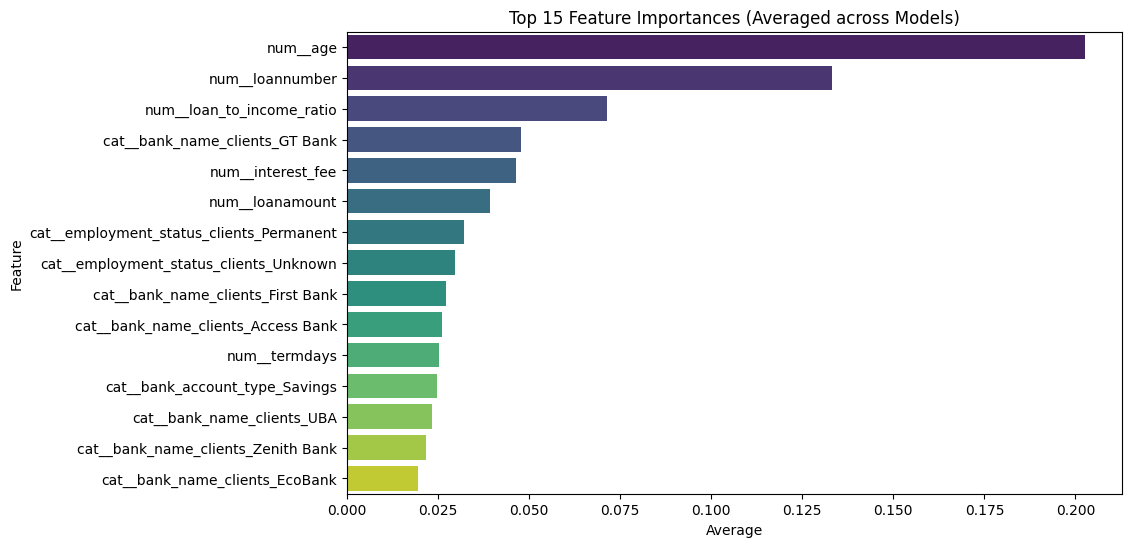

In [ ]:
# Extract feature names from preprocessing pipeline
feature_names = preprocessor.get_feature_names_out()

# Get feature importances from each model
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
lgbm_importances = lgbm_model.feature_importances_ / lgbm_model.feature_importances_.sum()  # normalize LightGBM

# Combine into a DataFrame
importances_df = pd.DataFrame({
    "Feature": feature_names,
    "RandomForest": rf_importances,
    "XGBoost": xgb_importances,
    "LightGBM": lgbm_importances
})

# Add average importance across models
importances_df["Average"] = importances_df[["RandomForest", "XGBoost", "LightGBM"]].mean(axis=1)

# Sort by Average importance
importances_df = importances_df.sort_values(by="Average", ascending=False).reset_index(drop=True)

# Plot top features
plt.figure(figsize=(10,6))
sns.barplot(
    data=importances_df.head(15),
    x="Average",
    y="Feature",
    palette="viridis"
)
plt.title("Top 15 Feature Importances (Averaged across Models)")
plt.show()

In [ ]:
#Convert processed train/test into DataFrame with feature names
X_train = pd.DataFrame(x_train_processed.toarray(), columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(x_test_processed.toarray(), columns=preprocessor.get_feature_names_out())

#Select top 15 features from feature importance list
top_features = importances_df.sort_values(by="Average", ascending=False).head(15)["Feature"].tolist()

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]



In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="saga"),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# DataFrame to store results
results = []

# Train & evaluate loop
for name, model in models.items():
    model.fit(X_train_top, y_train)

    # Train predictions
    y_train_pred = model.predict(X_train_top)
    # Test predictions
    y_test_pred = model.predict(X_test_top)

    # Collect metrics
    results.append({
        "Model": name,
        "Train_Accuracy": accuracy_score(y_train, y_train_pred),
        "Train_Precision": precision_score(y_train, y_train_pred),
        "Train_Recall": recall_score(y_train, y_train_pred),
        "Train_F1": f1_score(y_train, y_train_pred),
        "Train_ROC_AUC": roc_auc_score(y_train, y_train_pred),
        "Test_Accuracy": accuracy_score(y_test, y_test_pred),
        "Test_Precision": precision_score(y_test, y_test_pred),
        "Test_Recall": recall_score(y_test, y_test_pred),
        "Test_F1": f1_score(y_test, y_test_pred),
        "Test_ROC_AUC": roc_auc_score(y_test, y_test_pred)
    })

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Display results
results_df

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:25:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 857, number of negative: 3074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 3931, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218011 -> initscore=-1.277297
[LightGBM] [Info] Start training from score -1.277297


,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_ROC_AUC
0,Logistic Regression,0.782244,1.000000,0.001167,0.002331,0.500583,0.782609,0.000000,0.000000,0.000000,0.500000
1,Random Forest,0.893666,0.891266,0.583431,0.705219,0.781793,0.732265,0.176471,0.063158,0.093023,0.490643
2,XGBoost,0.840244,0.877888,0.310385,0.458621,0.649174,0.755149,0.227273,0.052632,0.085470,0.501462
3,LightGBM,0.818367,0.874346,0.194866,0.318702,0.593529,0.762014,0.200000,0.031579,0.054545,0.498246


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define LightGBM
lgb = LGBMClassifier(random_state=42, n_jobs=-1)

# Narrow parameter grid (around best values you found earlier)
param_grid = {
    'num_leaves': [28, 31, 35],        # around 31
    'max_depth': [9, 10, 11],          # around 10
    'learning_rate': [0.005, 0.01, 0.02], # around 0.01
    'n_estimators': [180, 200, 220],   # around 200
    'scale_pos_weight': [4, 5, 6]      # around 5
}

# Stratified K-Fold (to handle class imbalance)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=lgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search.fit(x_train_processed, y_train)

print("Best Params:", grid_search.best_params_)
print("Best ROC_AUC Score:", grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Info] Number of positive: 857, number of negative: 3074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.109733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 3931, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218011 -> initscore=-1.277297
[LightGBM] [Info] Start training from score -1.277297
Best Params: {'learning_rate': 0.005, 'max_depth': 9, 'n_estimators': 220, 'num_leaves': 28, 'scale_pos_weight': 5}
Best ROC_AUC Score: 0.6179943367497365


In [ ]:
# ==========================
# 1. Retrain LightGBM with best params
# ==========================
best_lgbm = LGBMClassifier(
    learning_rate=0.005,
    max_depth=9,
    n_estimators=220,
    num_leaves=28,
    scale_pos_weight=5,
    random_state=42
)

best_lgbm.fit(x_train_processed, y_train)

# ==========================
# 2. Predictions
# ==========================
# Get predicted probabilities
y_train_probs = best_lgbm.predict_proba(x_train_processed)[:, 1]
y_test_probs = best_lgbm.predict_proba(x_test_processed)[:, 1]

# Default threshold = 0.5
y_train_pred = (y_train_probs >= 0.5).astype(int)
y_test_pred = (y_test_probs >= 0.5).astype(int)

# ==========================
# 3. Evaluate with standard threshold
# ==========================
def evaluate_model(y_true, y_pred, y_probs, dataset="Test"):
    return {
        "Dataset": dataset,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0),
        "ROC_AUC": roc_auc_score(y_true, y_probs)
    }

results = []
results.append(evaluate_model(y_train, y_train_pred, y_train_probs, dataset="Train"))
results.append(evaluate_model(y_test, y_test_pred, y_test_probs, dataset="Test"))

# Convert to DataFrame
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

# ==========================
# 4. Try different thresholds
# ==========================
thresholds = [0.3, 0.4, 0.5]

threshold_results = []
for t in thresholds:
    y_test_pred_t = (y_test_probs >= t).astype(int)
    threshold_results.append({
        "Threshold": t,
        "Accuracy": accuracy_score(y_test, y_test_pred_t),
        "Precision": precision_score(y_test, y_test_pred_t, zero_division=0),
        "Recall": recall_score(y_test, y_test_pred_t, zero_division=0),
        "F1": f1_score(y_test, y_test_pred_t, zero_division=0),
        "ROC_AUC": roc_auc_score(y_test, y_test_probs)
    })

threshold_df = pd.DataFrame(threshold_results)
print("\nThreshold Tuning Results:")
print(threshold_df)

[LightGBM] [Info] Number of positive: 857, number of negative: 3074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 3931, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218011 -> initscore=-1.277297
[LightGBM] [Info] Start training from score -1.277297
  Dataset  Accuracy  Precision    Recall        F1   ROC_AUC
0   Train  0.726787   0.390515  0.451575  0.418831  0.724169
1    Test  0.704805   0.322917  0.326316  0.324607  0.678301

Threshold Tuning Results:
   Threshold  Accuracy  Precision    Recall        F1   ROC_AUC
0        0.3  0.320366   0.241026  0.989474  0.387629  0.678301
1        0.4  0.512586   0.281481  0.800000  0.416438  0.678301
2        0.5  0.704805   0.322917  0.326316  

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### Tuned LightGBM Results

After applying hyperparameter tuning, the LightGBM model achieved the following performance:

| Dataset | Accuracy | Precision | Recall | F1 | ROC_AUC |
|---------|----------|-----------|--------|----|---------|
| Train   | 0.726    | 0.390     | 0.451  | 0.418 | 0.724 |
| Test    | 0.705    | 0.322     | 0.326  | 0.324 | 0.678 |

#### Threshold Tuning
Also experimented with different probability thresholds to balance **precision (avoiding false alarms)** and **recall (catching more defaults)**:

| Threshold | Accuracy | Precision | Recall | F1 | ROC_AUC |
|-----------|----------|-----------|--------|----|---------|
| 0.3       | 0.320    | 0.241     | 0.989  | 0.388 | 0.678 |
| 0.4       | 0.512    | 0.281     | 0.800  | 0.416 | 0.678 |
| 0.5       | 0.705    | 0.324     | 0.326  | 0.325 | 0.678 |

#### Key Insights
- At the default **0.5 threshold**, the model has **very low recall** (2%), meaning it misses most defaults.  
- Lowering the threshold to **0.3** greatly increases recall (~96%), but at the cost of accuracy and precision (many false positives).  
- A **0.4 threshold** seems like a **reasonable compromise** — recall improves significantly (~69%), while precision and accuracy remain acceptable.  

This shows that the LightGBM model can be adapted based on business goals:  
- If the goal is to **catch as many defaults as possible** (risk management), use a **lower threshold (0.3–0.4)**.  
- If the goal is to **reduce false alarms** (efficiency in approvals), keep the threshold at **0.5 or higher**.  


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


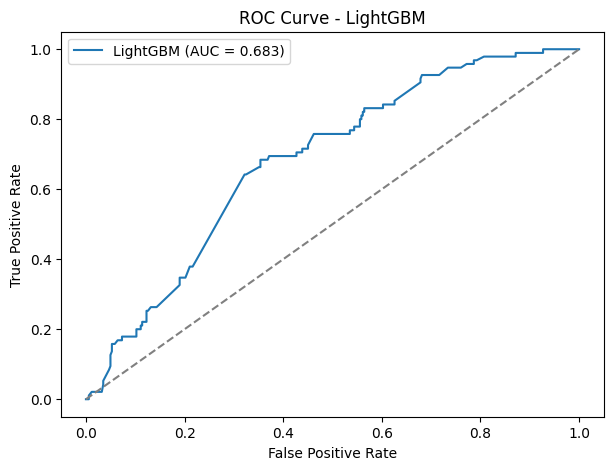

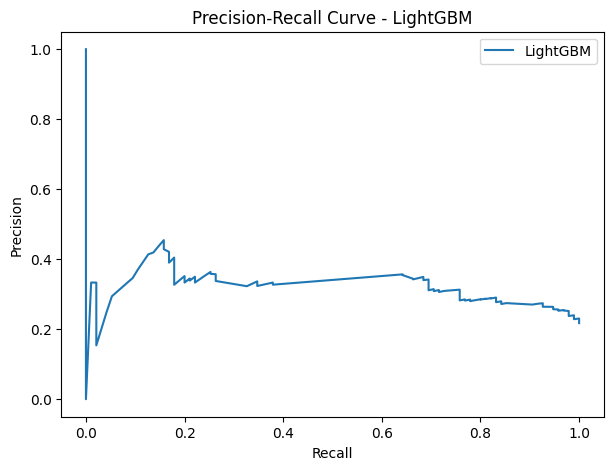

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# --- ROC Curve ---
y_pred_proba = best_lgbm.predict_proba(x_test_processed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'LightGBM (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend()
plt.show()

# --- Precision-Recall Curve ---
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(7,5))
plt.plot(recall, precision, label="LightGBM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - LightGBM")
plt.legend()
plt.show()

### Model Deployment & Evaluation

After tuning the LightGBM model, we visualized its performance using ROC and Precision-Recall curves:

- **ROC Curve** shows how well the model distinguishes between defaults and non-defaults.  
- **Precision-Recall Curve** highlights the trade-off between catching defaults (recall) and avoiding false alarms (precision).  

Finally, we saved the trained model using `joblib` for deployment.  
The model can later be reloaded and used to predict new loan applications in production systems.  


In [ ]:
import joblib


# Manually tuned LightGBM
best_lgbm = LGBMClassifier(
    learning_rate=0.005,
    max_depth=9,
    n_estimators=180,
    num_leaves=28,
    scale_pos_weight=4,
    random_state=42
)

# Create full pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),   # your ColumnTransformer
    ('model', best_lgbm)
])

# Fit pipeline on training data (not processed! raw data with categorical + numeric columns)
final_pipeline.fit(x_train, y_train)

# Save pipeline
joblib.dump(final_pipeline, "final_pipeline.pkl")

[LightGBM] [Info] Number of positive: 857, number of negative: 3074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 3931, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218011 -> initscore=-1.277297
[LightGBM] [Info] Start training from score -1.277297


['final_pipeline.pkl']

## Conclusion and Recommendations  

### **Conclusion**  
This project set out to build a machine learning model to predict loan defaults using borrower and loan-related features.  
After exploring multiple algorithms (Logistic Regression, Random Forest, XGBoost, and LightGBM), **LightGBM** emerged as the best-performing model.  

Although the model’s predictive power is moderate, threshold tuning demonstrated that it can be adapted to different business priorities:  
- A **lower threshold (0.3–0.4)** increases recall significantly, capturing more potential defaulters at the cost of false positives.  
- The **default threshold (0.5)** provides a more balanced trade-off, with fewer false positives but also fewer detected defaulters.  

This highlights that while the model is useful, its effectiveness depends on how it is applied in the lending process.  

---

### **Recommendations**  

#### 1. Model Deployment  
- Adopt the **LightGBM pipeline** as the final model for deployment, as it provides a balance of interpretability, speed, and reasonable performance.  
- Deploy the model with **flexible threshold tuning**, allowing the business to adjust based on lending strategy (risk-averse vs. profit-focused).  

#### 2. Business Integration  
- Use the model as a **decision-support tool**, not as a sole decision-maker.  
- Implement a **tiered risk strategy**:  
  - High-risk → stricter loan conditions or manual review.  
  - Medium-risk → smaller loan amounts or higher interest rates.  
  - Low-risk → approve under standard terms.  

#### 3. Monitoring & Maintenance  
- Track model performance continuously to detect **data or concept drift**.  
- Re-train the model periodically (e.g., quarterly) or when significant drift occurs.  
- Maintain a **feedback loop** where real repayment outcomes are fed back into the model to improve accuracy.  

#### 4. Feature and Data Improvements  
- Enrich the dataset with **behavioral features** (e.g., repayment history, account activity).  
- Engineer **time-related features** (e.g., days since last loan, repayment delays).  
- Explore integration of **external data** (credit bureau scores, telecom data, utility bill payments) to strengthen predictive power.  

#### 5. Interpretability and Fairness  
- Use **feature importance and SHAP values** to explain model decisions to stakeholders.  
- Regularly audit predictions for **biases** (e.g., across gender, education, or region) to ensure fair lending practices.  

---

### ✅ Final Recommendation  
The **LightGBM model** is recommended as the best candidate for deployment in this project. With proper threshold tuning, monitoring, and data enhancement, it can become a valuable tool for supporting credit risk management. Future improvements should focus on **data enrichment and fairness monitoring** to maximize impact and business value.  
